# Title: Kick and Punch Classifier

![Example Image](images/1.png)

### Authors: Jorge Luis Galarraga, Sirjana Shrestha, Mark Kale, Parthasarthy Amit

### Abstract

This project focuses on developing a classifier to identify kicks and punches in MMA fights using a dataset consisting of 597 annotated images captured from raw MMA fights, courtesy of Roboflow. Initially, we trained six models (VGG, Resnet50, InceptionResnetV2, MobileNetV2 , EfficientNetB0 , YoloV8) with four image classes: kick, punch, kicknt (kick no touch), and punchnt (punch no touch). However, these models only achieved an average accuracy of 30%, and despite making various attempts at data augmentation and using different models for training, we couldn't improve their performance.

To address this issue, we simplified the problem by removing the kicknt and punchnt classes and retrained the six models with just two classes: kick and punch. This modification resulted in a significant improvement, with an average accuracy increase of 30% across all models.

In an effort to further enhance the performance, we decided to experiment with the YoloV8n classification model. To ensure fair comparisons, we conducted experiments using both the original dataset with four classes and the simplified dataset with two classes. These experiments aimed to identify the most suitable model and approach for accurately classifying kicks and punches in MMA fights.

Among the six models we trained, YOLOV8 model was the best performer with the accuracy of 75% and EfficientNET was the least performer with accuracy of  53.12%. We have also created a Streamlit app for kick and punch classifier using YOLOV8 model.

StreamLit URL: https://kick-and-punch-classifier.streamlit.app/

GitHub repository: https://github.com/jorgeluisgalarraga/kick-and-punch-detection

### Introduction


The MMA industry is undergoing rapid expansion, marked by a global upsurge in viewership and engagement. However, in contrast to other sports, the sports analytics domain within MMA remains nascent, presenting a promising avenue for pioneering solutions. Performance analysis in MMA is intricate, owing to the diverse spectrum of skills involved, often reliant on human expertise. Recognizing this void, we propose an innovative concept: an advanced classifier app engineered to precisely discern and categorize kicks and punches using video and image processing. This app stands to be a transformative tool for MMA contests.

Moreover, this app promises manifold advantages to coaches, referees, and the data driven realm of player statistics. Coaches could harness real-time insights to tailor training regimens, pinpoint strengths, and mitigate weaknesses, ushering in elevated athlete preparation. Referees, grappling with split-second decisions, would gain an unprecedented aid in judging fight dynamics accurately, ensuring fair outcomes. The app's ability to generate comprehensive player statistics fuels data-driven performance evaluation, facilitating informed strategy development and insightful post-fight assessments. As MMA continues its ascent, this app emerges as a game-changer, and reshaping the landscape of sports analytics.

### Related Work

No comparable findings were discovered on Kaggle. While certain applications exist, they diverge from our proposed concept.

### Data

We curated a custom dataset from the ground up, immersing ourselves in MMA videos on YouTube and meticulously capturing screenshots. Complementing this, we embarked on a quest for diverse fight images from across the internet. This comprehensive dataset encompasses four distinct classes: "kick," "kicknt" (no touch), "punch," and "punchnt" (no touch).

To expedite the image classification process and optimize dataset division, we harnessed the power of the Roboflow tool. Its capabilities proved instrumental, delivering an exceedingly efficient and user-intuitive solution. The utilization of Roboflow empowered us to systematically arrange, annotate, and categorize the images, rendering it a valuable asset and aiding our project's success.

Tha dataset can be downloaded from: https://universe.roboflow.com/georgebrown/punch-and-kick-detection-group

#### Our dataset and classes

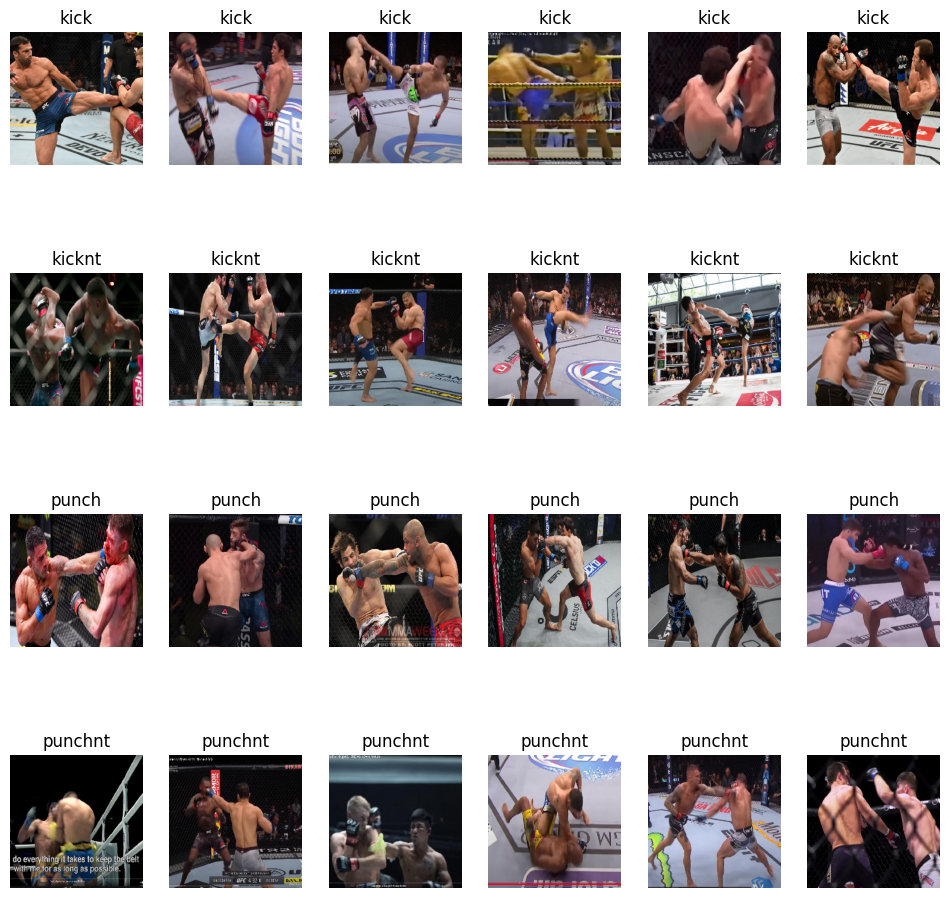

In [ ]:
# Number of samples per class to display
num_samples_per_class = 6

# Function to display sample images from each class
def show_sample_images(data_dir, classes, num_samples_per_class):
    plt.figure(figsize=(12,12))

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        class_images = random.sample(os.listdir(class_dir), num_samples_per_class)

        for j, image_name in enumerate(class_images):
            image_path = os.path.join(class_dir, image_name)
            image = load_img(image_path, target_size=(weight_size, height_size))

            plt.subplot(len(classes), num_samples_per_class, i * num_samples_per_class + j + 1)
            plt.imshow(image)
            plt.title(class_name)
            plt.axis('off')

    plt.show()

# Call the function to show sample images from each class
show_sample_images(train_path, classes, num_samples_per_class)


### Methods

In order to optimize performance, we explored a range of image classification models, namely VGG, Resnet50, InceptionResnetV2, MobileNetV2 , EfficientNetB0 and YoloV8. The four distinct classes we chose were kick, punch, kicknt (kick no touch), and punchnt (punch no touch). The intricacy of the four classes was compounded by their similarity and it often led the model to confusion. Unexpectedly, the introduction of dropout, a technique aimed at enhancing robustness, paradoxically resulted in reduced model accuracy. Despite employing data augmentation techniques, our progress encountered a barrier, resulting in an average accuracy plateau of 30%.

In order to address this problem, we strategically simplified the classification by eliminating kicknt and punchnt classes, refocusing solely on kick and punch. This recalibration yielded a remarkable transformation, catapulting our average accuracy across all models by an impressive 30%. To elevate performance even further, we embarked on a fresh avenue of experimentation – the YoloV8n classify model. To ensure fair comparisons, we conducted experiments using both the original four-class dataset and the simplified two-class dataset, aiming to find the most optimal solution.

##### Our dataset with data augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,           # Normalize pixel values to [0,1]
    rotation_range=90,           # Randomly rotate images by up to 20 degrees
    width_shift_range=0.4,       # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.4,      # Randomly shift images vertically by up to 20% of the height
    shear_range=0.5,             # Apply shear transformation
    zoom_range=0.2,              # Randomly zoom images by up to 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Use the nearest pixel to fill missing areas after augmentation
)

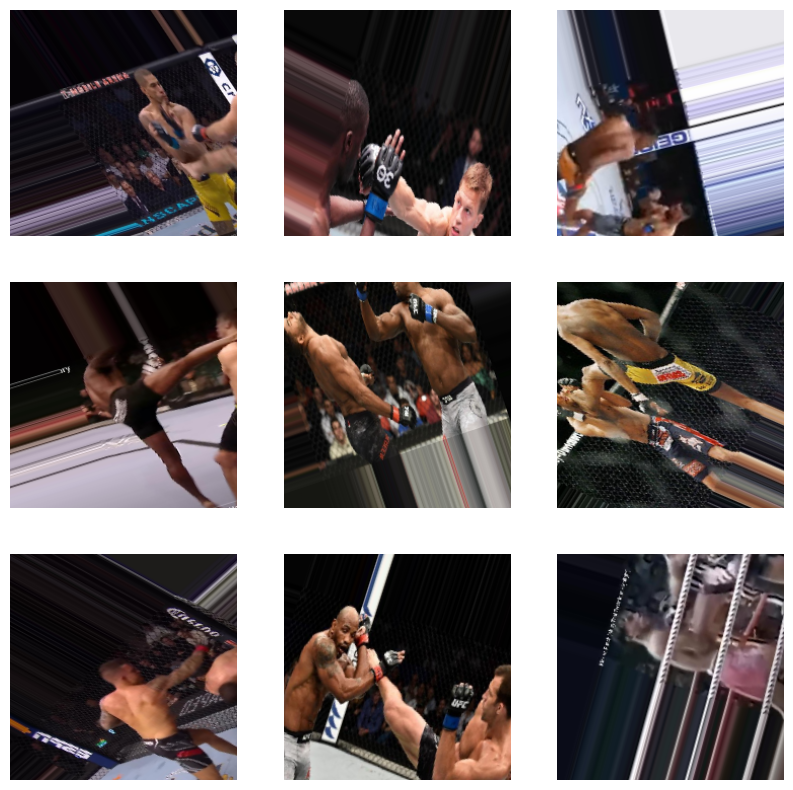

In [ ]:
plt.figure(figsize=(10, 10))
images, _ = next(training_set)
for i, image in enumerate(images[: 9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')

## Experiments

## First, we trained 6 models with 4 classes

## 1. VGG16 model with 100.356 trainable params and 14.815.044 total params, no dropout but with data augmentation

In [ ]:
#Load the VGG16 model with pre-trained weights
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# freeze the layers
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
#x = Dropout(0.5)(x)
#x = Dense(256, activation='relu')(x)

# adding output layer with number of classes = len(folders)
# it is a dense (fully connected) layer with a softmax activation function
prediction = Dense(len(folders), activation='softmax')(x)
vgg_model = Model(inputs=vgg.input, outputs=prediction)

2023-07-31 22:26:49.123558: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-31 22:26:49.184694: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-31 22:26:49.184869: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
test_model = keras.models.load_model(
    "./models/convnet_vgg_4_classes.keras")
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

2023-07-31 22:30:02.862289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 2s 1s/step - loss: 1.3956 - accuracy: 0.3443
Test accuracy: 0.344


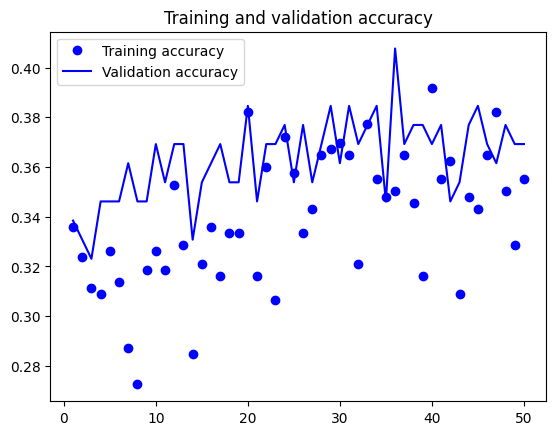

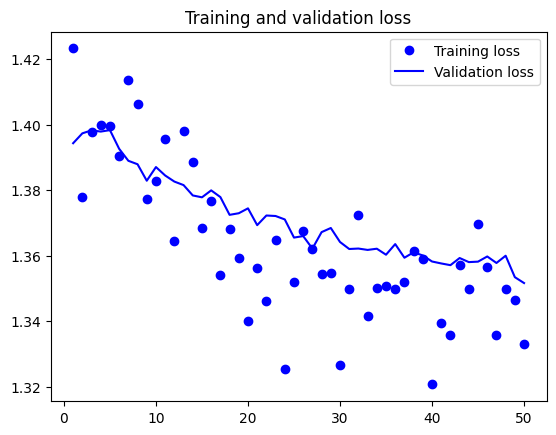

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 2. ResNet50V2 with 401.412 trainable parameters and 23.966.212 total params, no dropout but with data augmentation

In [ ]:
resnet = ResNet50V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#freezing the layers
for layer in resnet.layers[:-1]:
    layer.trainable = False

# defining the final layers of the model.
x = Flatten()(resnet.output)

prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# definfing the final layers of the model
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)

In [ ]:
test_model = keras.models.load_model(
    "./models/convnet_resnet_4_classes.keras")
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

2023-07-31 22:32:57.575761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 1s 548ms/step - loss: 8.8857 - accuracy: 0.3115
Test accuracy: 0.311


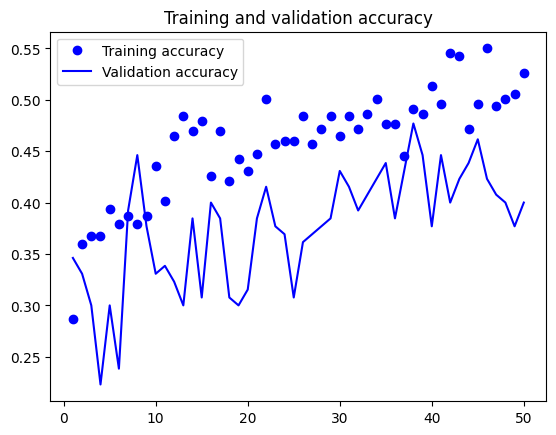

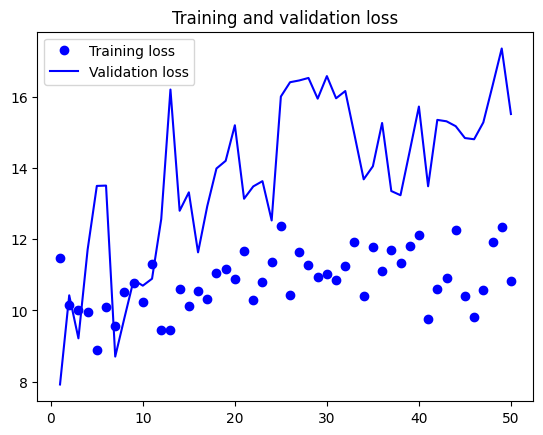

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 3. InceptionResNetV2 with 3.985.412 trainable parameters and 55.125.732 total params, with dropout of 0.5, Average Pooling and a fully connect layer

In [ ]:
# definfing the final layers of the model
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)

In [ ]:
test_model = keras.models.load_model(
    "./models/convnet_inceptionResnet_4_classes.keras")
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

2023-07-31 22:36:44.943435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 3s 2s/step - loss: 1.3807 - accuracy: 0.3443
Test accuracy: 0.344


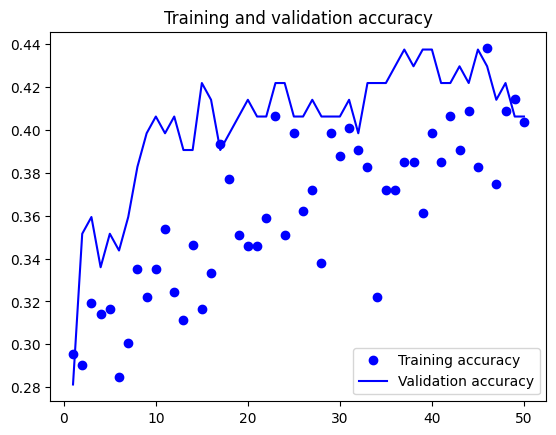

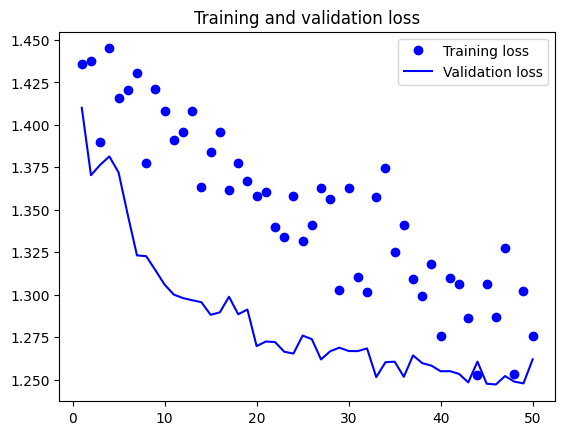

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 4. MobileNETV2 with 726,820 trainable parameters and 2,985,828 total parameters, with dropout of 0.3, Average Pooling and a fully connected layer

In [ ]:
# creating a new sequential model using a pre-trained MobileNetV2
tf.keras.backend.clear_session()

model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "ReLU"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "ReLU"),
                    Dropout(0.1),
                    Dense(32, activation = "ReLU"),
                    Dropout(0.3),
                    Dense(4, activation = "sigmoid")])

model.layers[0].trainable = False

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics="accuracy")

model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

In [ ]:
test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

/var/folders/qn/c0ll_4m107d0w2b21m8wkgz80000gn/T/ipykernel_1296/1841467748.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)


2/2 [==============================] - 0s 189ms/step - loss: 1.4826 - accuracy: 0.2500
Test Accuracy:  25.0 %


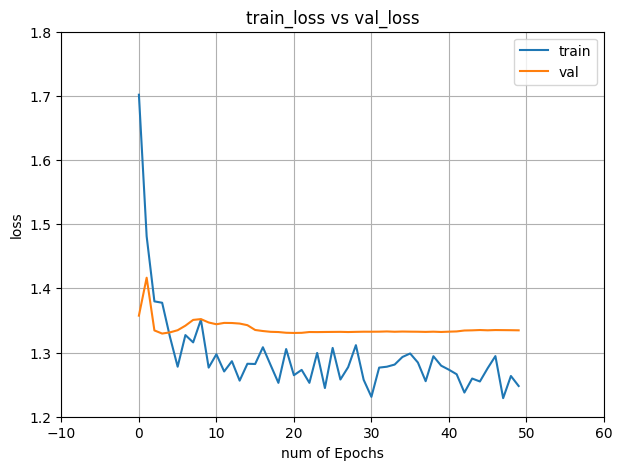

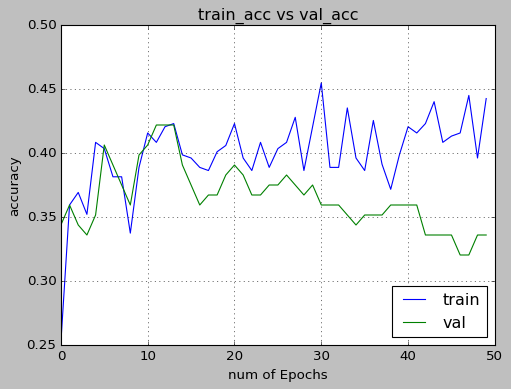

In [ ]:
epochs = 50
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

## 5. EfficientNET with 4,012,672 trainable parameters and 4,054,688 total parameters, with dropout of 0.5, GlobalAveragePooling and a fully connected layer

In [ ]:
efnb0 = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3), classes=n_classes)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 4,054,688
Trainable params: 4,012,672
Non-trainable params: 42,016
_________________________________________________________________


In [ ]:
test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

/var/folders/qn/c0ll_4m107d0w2b21m8wkgz80000gn/T/ipykernel_1296/1841467748.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)


2/2 [==============================] - 1s 421ms/step - loss: 1.3885 - accuracy: 0.3167
Test Accuracy:  31.67 %


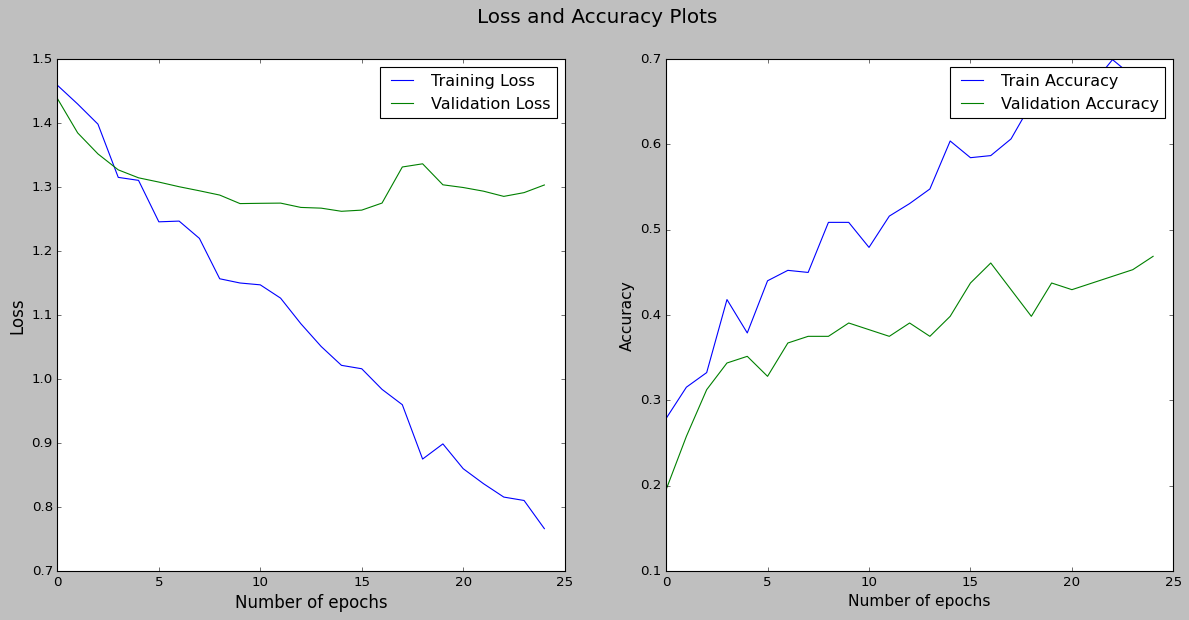

In [ ]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

## 6. YoloV8 with 99 layers, 1443412 parameters, 1443412 gradients

In [ ]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)

In [ ]:

# Train the model
model.train(data='/home/jorgeluisg/Documents/001_George_brown/DL_2/project/dataset', epochs=20, imgsz=64)

New https://pypi.org/project/ultralytics/8.0.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.9.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/home/jorgeluisg/Documents/001_George_brown/DL_2/project/dataset, epochs=20, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, v

In [ ]:
# Predict with the model
results = predict(source)  # predict on an image


image 1/1 /home/jorgeluisg/Documents/001_George_brown/DL_2/project/data/test/punch/Holm-vs-Aldana-1024x682_jpg.rf.09bae4f158e1f8cbb74a4047dbdafe5b.jpg: 64x64 punch 0.73, kick 0.27, 2.0ms
Speed: 0.7ms preprocess, 2.0ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


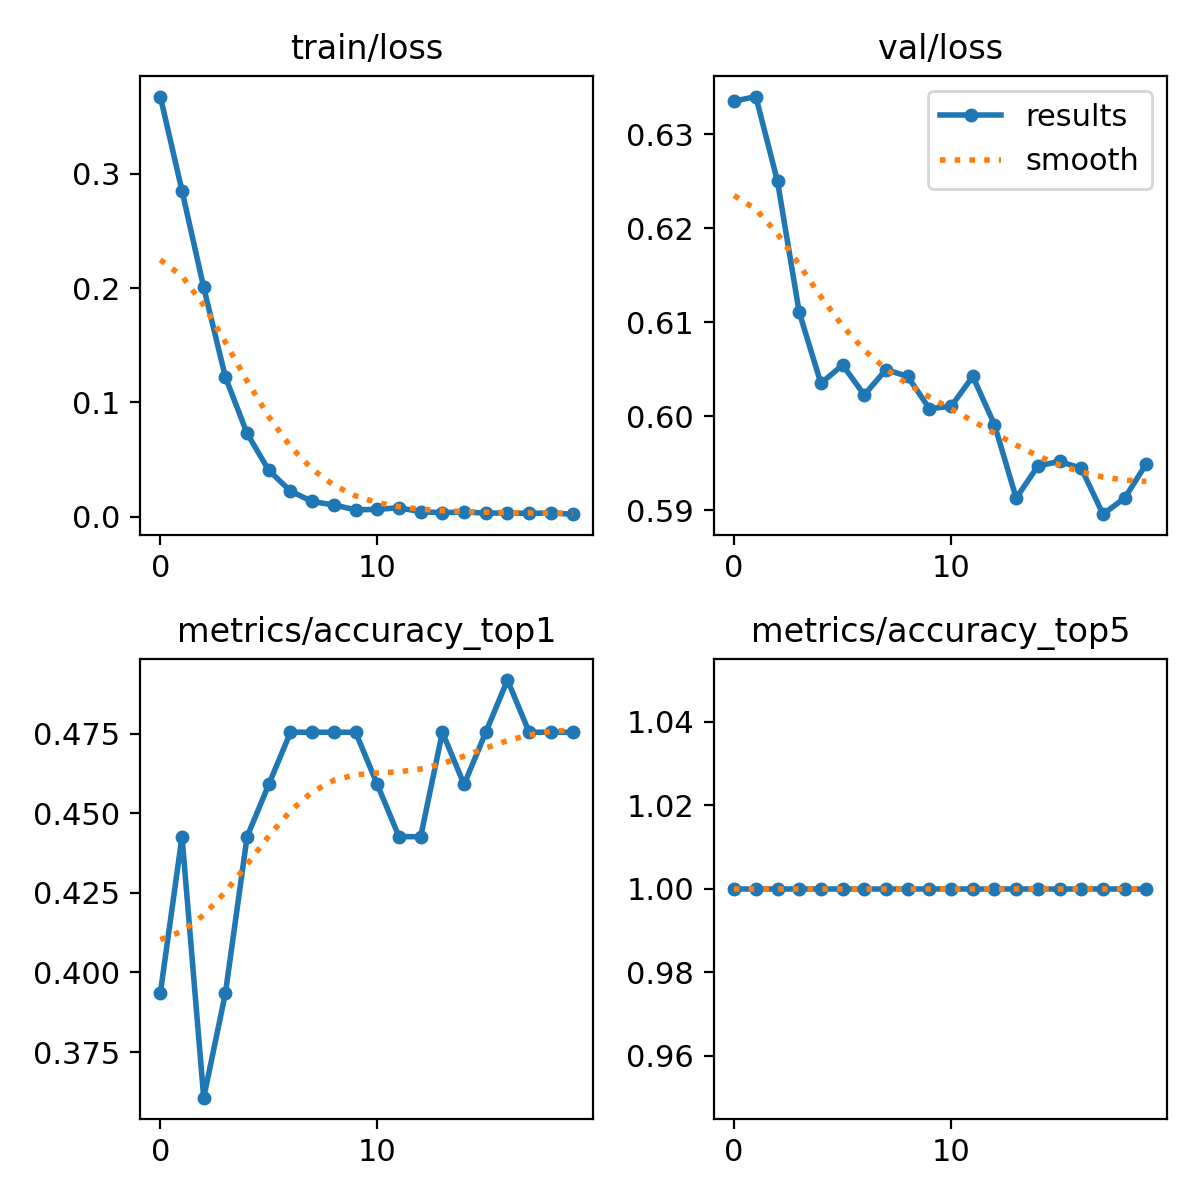

##### Then we noticed that, accuracy with all six models are so low, so we decided to remove two classes and trained all the models again

## 1. VGG16 model with Total params: 14,764,866, Trainable params: 50,178, with dropout and data augmentation (for 2 Classes)

In [ ]:
#Load the VGG16 model with pre-trained weights
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
# Adding custom layers on top of VGG16
x = Flatten()(vgg.output)
# adding a dropout layer to prevent overfitting
x = Dropout(0.5)(x)
# adding output layer with number of classes = len(folders)
# it is a dense (fully connected) layer with a softmax activation function
prediction = Dense(len(folders), activation='softmax')(x)
# taking the VGG16 model's input and connecting it to the custom layers added earlier for prediction.
vgg_model = Model(inputs=vgg.input, outputs=prediction)

2023-08-01 11:12:26.447920: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-01 11:12:26.478736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-01 11:12:26.478920: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [ ]:
# load best model
test_model = keras.models.load_model(
    "./models/convnet_with_just_vgg.keras")
# evaluate the model on the testset
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

2023-08-01 11:20:21.574189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 0s 98ms/step - loss: 0.6331 - accuracy: 0.6333
Test accuracy: 0.633


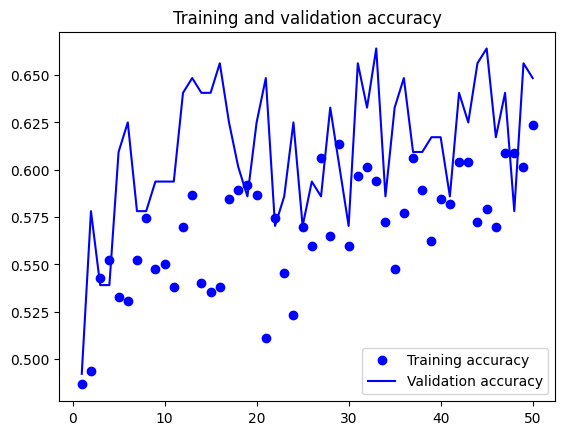

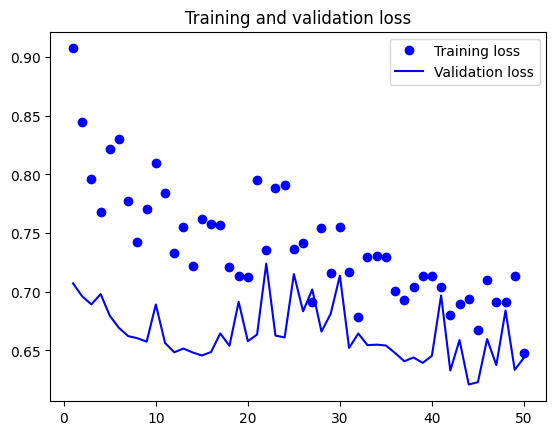

In [ ]:
# Plotting the training loss and validation loss
# Plotting the training accuracy and validation accuracy

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 2. ResNet50V2 with Total params: 23,765,506 and Trainable params: 200,706, with no dropout and with data augmentation (for 2 Classes)

In [ ]:
# defining the model 
resnet = ResNet50V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
resnet_model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# loading the model and displaying the accuracy on the test data
test_model = keras.models.load_model(
    "./models/convnet_with_resnet.keras")
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

2023-08-01 11:46:05.944602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 1s 555ms/step - loss: 1.1269 - accuracy: 0.5667
Test accuracy: 0.567


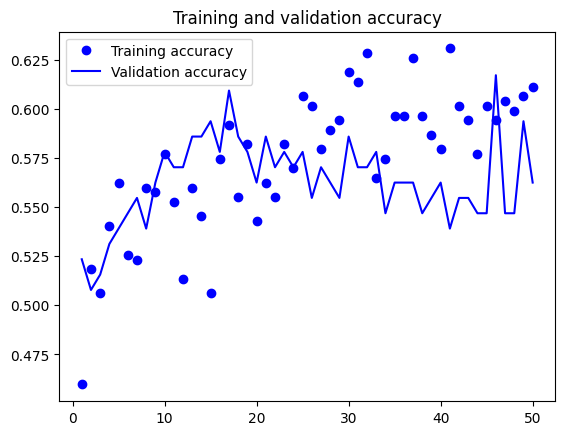

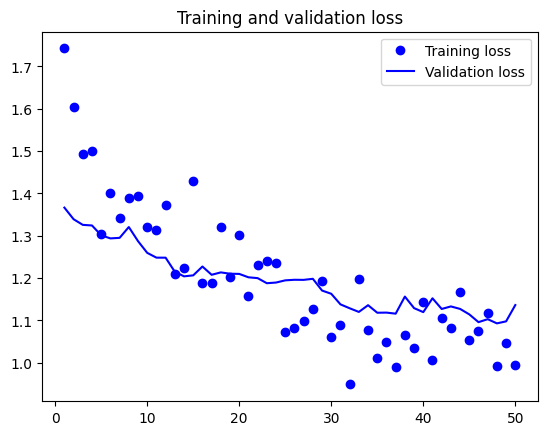

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 3. InceptionResNetV2 with Total params: 54,339,810 and Trainable params: 3,074, with dropout of 0.5, Global Average Pooling and a fully connect layer

In [ ]:
# Defining the model
inception = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

for layer in inception.layers:
    layer.trainable = False
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

inception_model = Model(inputs=inception.input, outputs=predictions)

In [ ]:
test_model = keras.models.load_model(
    "./models/convnet_with_inceptionResnet.keras")
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

2023-08-01 12:29:18.248080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 3s 1s/step - loss: 0.6795 - accuracy: 0.6000
Test accuracy: 0.600


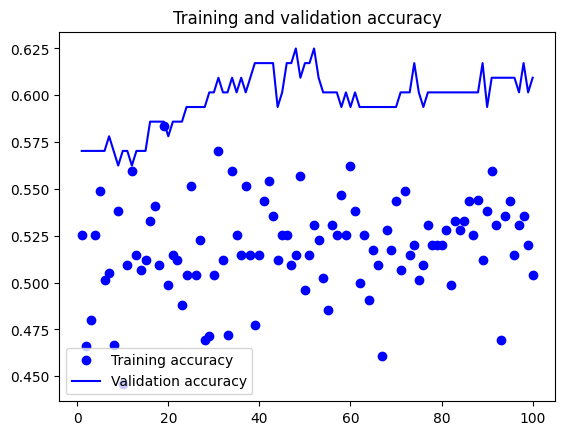

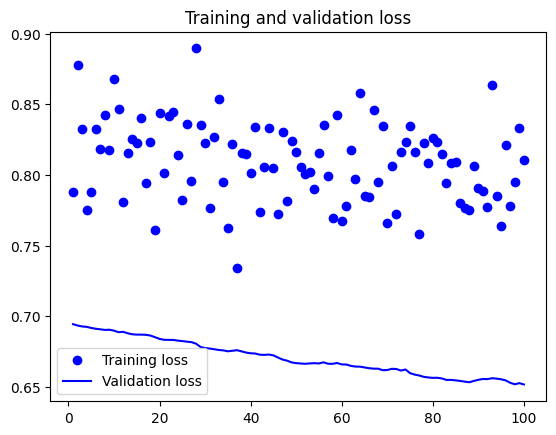

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 4. MobileNETV2 with Total params: 2,985,762 and Trainable params: 726,754, with dropout of 0.3, Average Pooling and a fully connected layer

In [ ]:
tf.keras.backend.clear_session()
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(224,224,3))
model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "ReLU"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "ReLU"),
                    Dropout(0.1),
                    Dense(32, activation = "ReLU"),
                    Dropout(0.3),
                    Dense(2, activation = "sigmoid")])

model.layers[0].trainable = False

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics="accuracy")

model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

In [ ]:
test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

/var/folders/qn/c0ll_4m107d0w2b21m8wkgz80000gn/T/ipykernel_1833/1841467748.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)


1/1 [==============================] - 0s 176ms/step - loss: 0.6556 - accuracy: 0.6562
Test Accuracy:  65.62 %


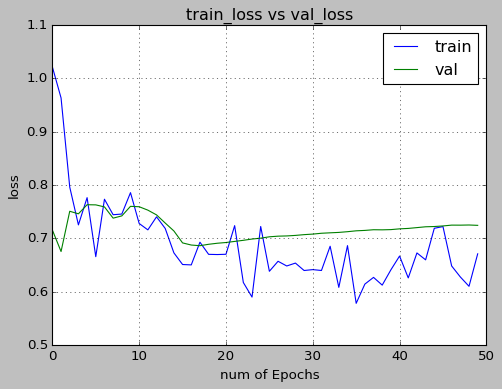

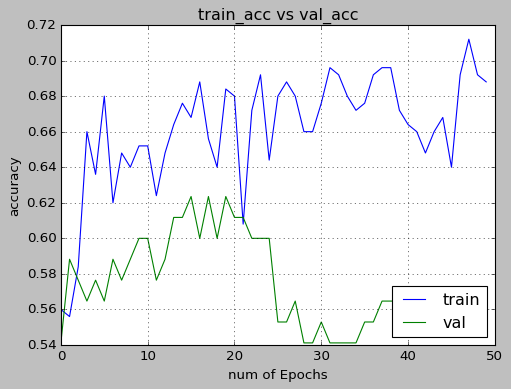

In [ ]:
epochs = 50
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

## 5. EfficientNET with Total params: 4,052,126 and Trainable params: 4,010,110, with dropout of 0.5, GlobalAveragePooling and a fully connected layer

In [ ]:
efnb0 = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3), classes=n_classes)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 4,052,126
Trainable params: 4,010,110
Non-trainable params: 42,016
_________________________________________________________________


In [ ]:
test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

/var/folders/qn/c0ll_4m107d0w2b21m8wkgz80000gn/T/ipykernel_1833/1841467748.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)


1/1 [==============================] - 0s 230ms/step - loss: 0.5937 - accuracy: 0.5312
Test Accuracy:  53.12 %


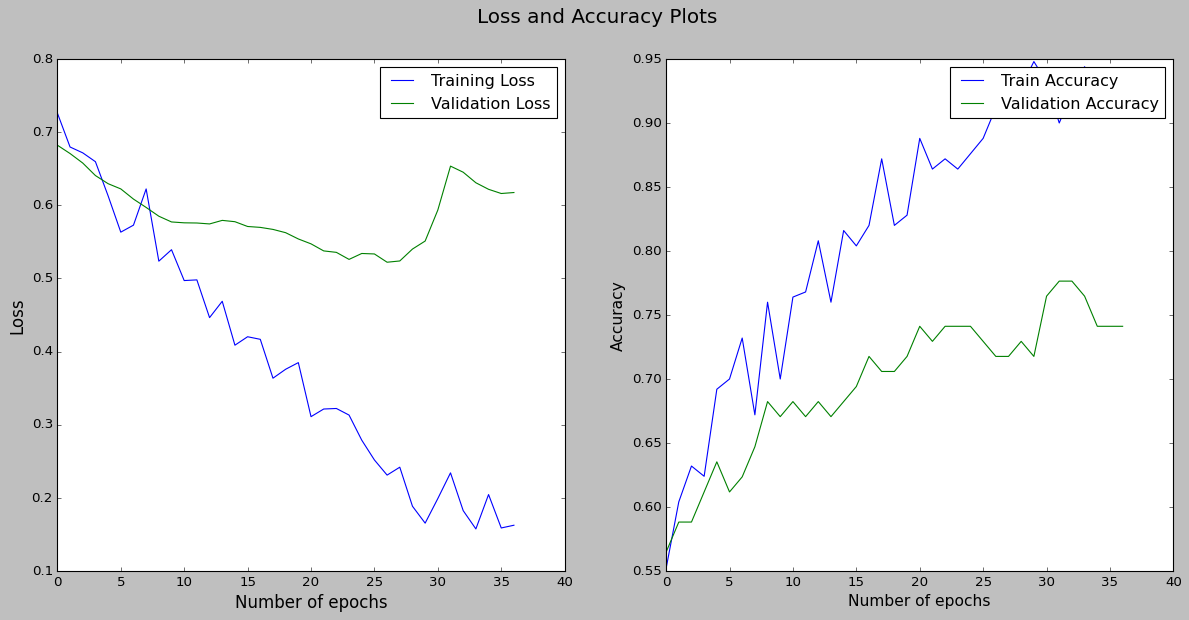

In [ ]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

## 6. YoloV8 with 99 layers, 1440850 parameters, 1440850 gradients

In [ ]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)

In [ ]:

# Train the model
model.train(data='/home/jorgeluisg/Documents/001_George_brown/DL_2/project/data', epochs=20, imgsz=64)

Ultralytics YOLOv8.0.145 🚀 Python-3.9.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/home/jorgeluisg/Documents/001_George_brown/DL_2/project/data, epochs=20, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

In [ ]:
# Predict with the model
results = predict(source)  # predict on an image


image 1/1 /home/jorgeluisg/Documents/001_George_brown/DL_2/project/data/test/punch/Holm-vs-Aldana-1024x682_jpg.rf.09bae4f158e1f8cbb74a4047dbdafe5b.jpg: 64x64 punch 0.73, kick 0.27, 2.4ms
Speed: 1.0ms preprocess, 2.4ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


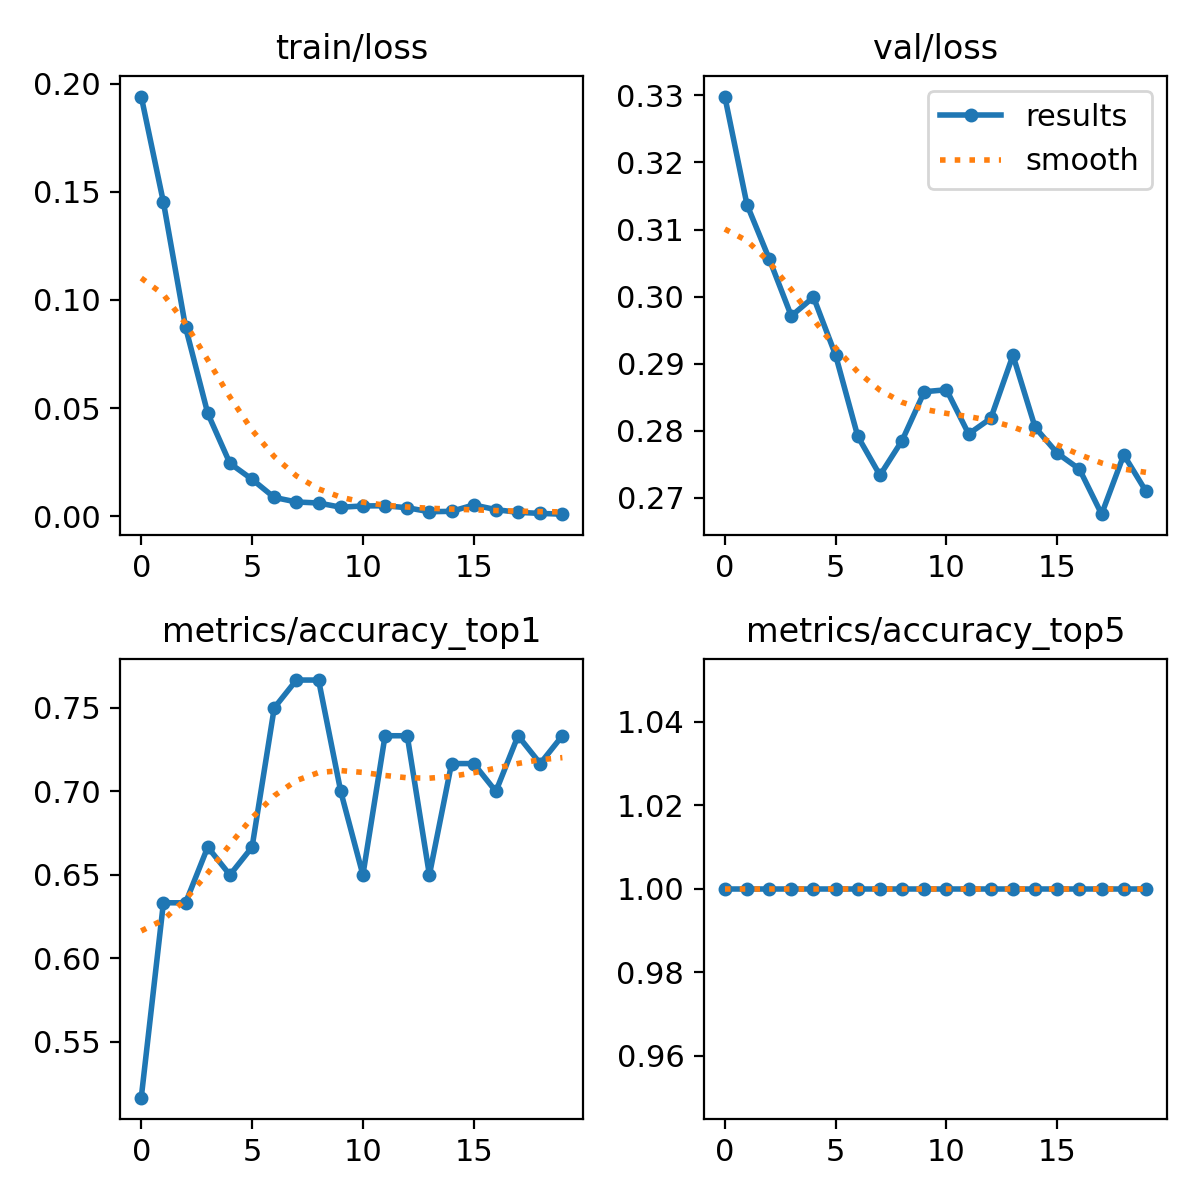

#### Model Results

| Model VS Accuracy | With 4 classes | With 2 classes |
| ------------------| -------------- | -------------- |
| VGG 16            | 34.4%          |  63.3%         |
| ResNet50V2        | 31.1%          |  56.7%         |
| InceptionResNetV2 | 34.4%          |  60%           |
| MobileNETV2       | 25%            |  65.62%        |
| EfficientNET      | 31.67%         |  53.12%        |
| YOLO V8           | 47.5%          |  75%           |

### Conclusion

Through an exploration of prominent image classification models, including VGG, ResNet50, InceptionResNetV2, MobileNetV2, EfficientNetB0, and YOLOv8, we encountered a complex challenge driven by the intricate similarities among the four classes: kick, punch, kicknt, and punchnt. Surprisingly, introducing dropout hindered rather than enhanced accuracy, leading to a performance plateau of 30% despite data augmentation. We focused on kick and punch classes alone and it resulted in a remarkable 30% accuracy improvement across models. Further experimentation with YOLOv8n, comparing the original four-class dataset with a simplified two-class version, consistently demonstrated YOLOv8n's superior accuracy, cementing its role as the optimal solution for our specific task and validating our efforts.

Link to Streamlit app: https://kick-and-punch-classifier.streamlit.app/

# Agile Methodologies using Jira

### Burndown Chart

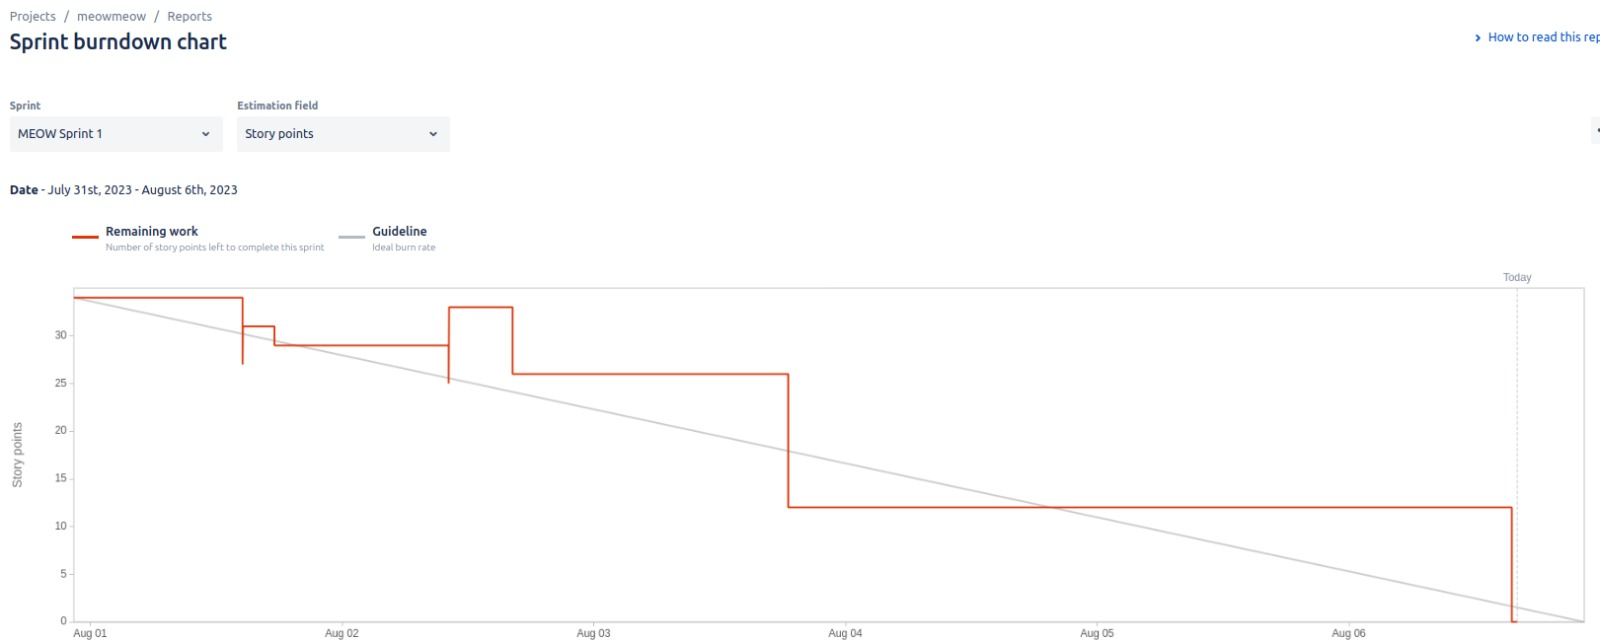

### Burnup Chart

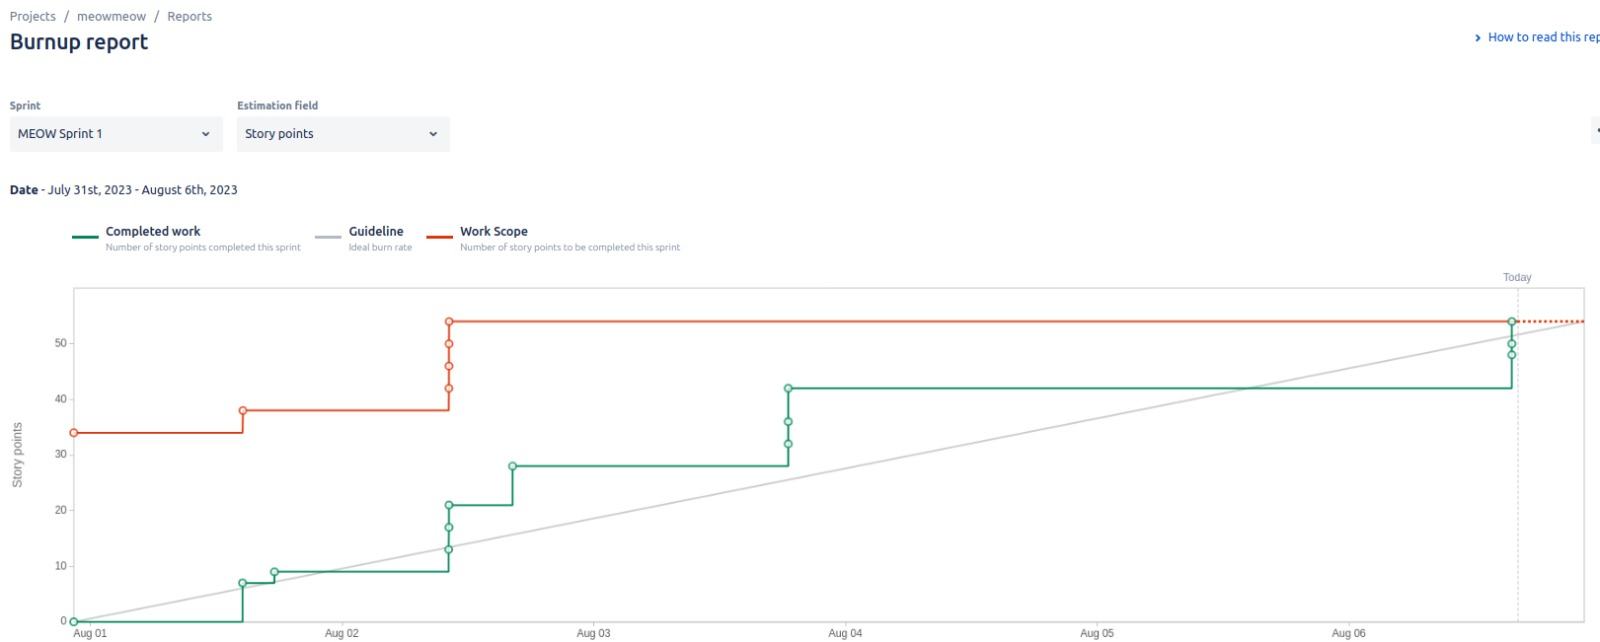

### Cumulative flow diagram

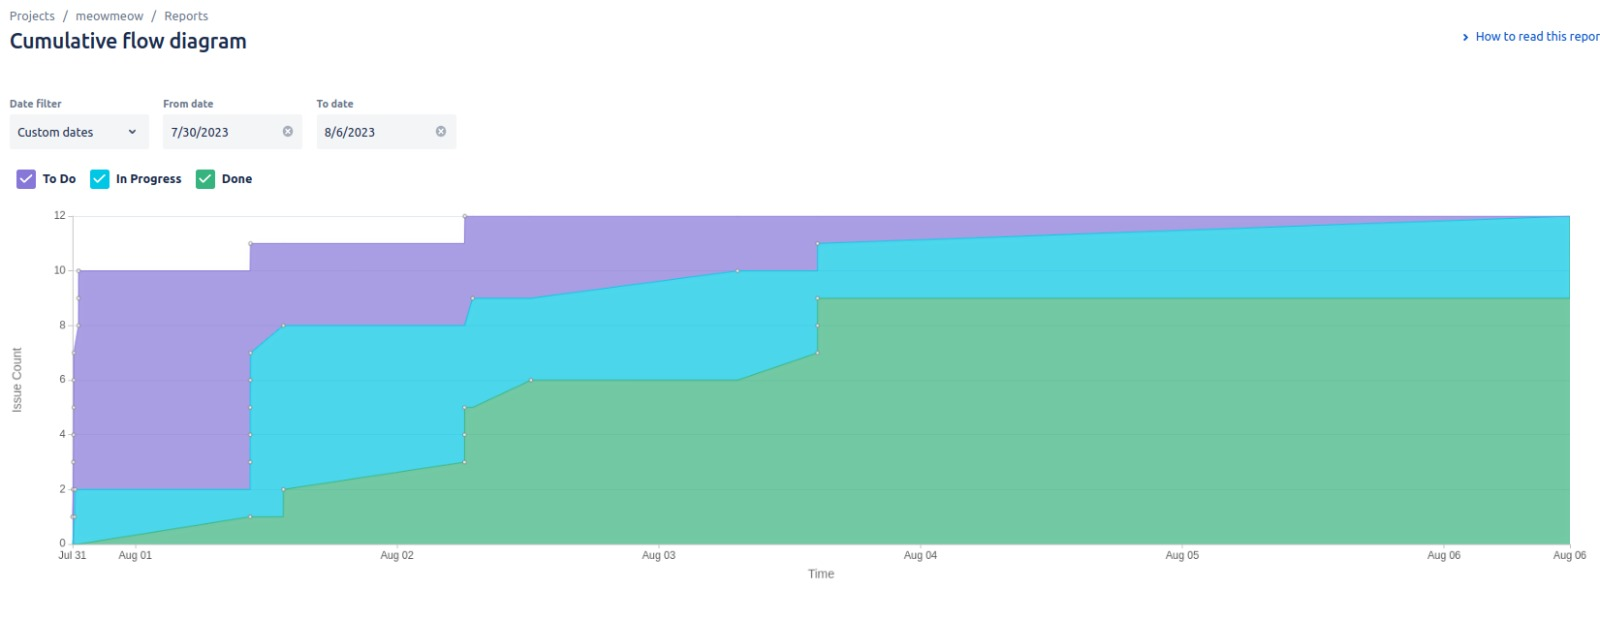

